In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE #Para balancear la data

# Importar Keras y librerías adicionales(para las redes neuronales)
import keras
from  keras.models import Sequential
from keras.layers import Dense    
from keras.layers import Dropout     #me va a permitir aplicar tecnicas de regularizacion para evitar el sobreajuste

from sklearn.metrics import classification_report
from sklearn import metrics as metrics
from sklearn.metrics import confusion_matrix

from tensorflow.keras.callbacks import EarlyStopping #me va a permitir aplicar tecnicas de regularizacion para evitar el sobreajuste

from tensorflow.keras.models import load_model
from keras.initializers import RandomUniform  #

# %matplotlib inline
# sns.set_style("whitegrid")
# plt.style.use("fivethirtyeight")

# pd.set_option("display.float_format", "{:.2f}".format)
# pd.set_option("display.max_columns", 80)
# pd.set_option("display.max_rows", 80)

In [2]:
fraude_df = pd.read_csv("data_Attrition.csv")
fraude_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
fraude_df.shape

(1470, 35)

In [4]:
fraude_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
fraude_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
# Mostrar los descriptivos
fraude_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [7]:
# Mostrar los descriptivos
fraude_df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


In [8]:
# Sumar la cantidar de valores perdidos según variables
fraude_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


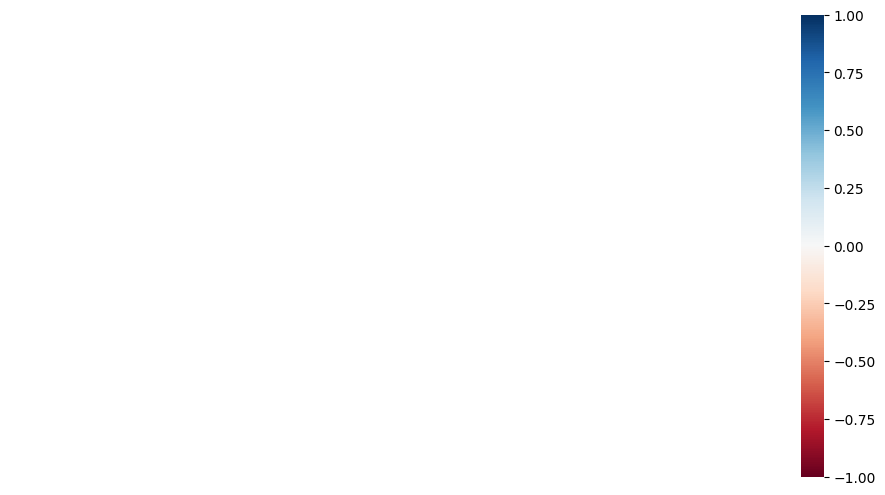

In [ ]:
#Evaluar la correlación de nulidad: qué tan fuertemente la presencia o ausencia de una variable afecta la presencia de otra:
msno.heatmap(fraude_df, figsize=(12,6));

In [9]:
cambio_attrition = {"Attrition": {"Yes": 1, "No": 0}}

In [10]:
fraude_df = fraude_df.replace(cambio_attrition)
fraude_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


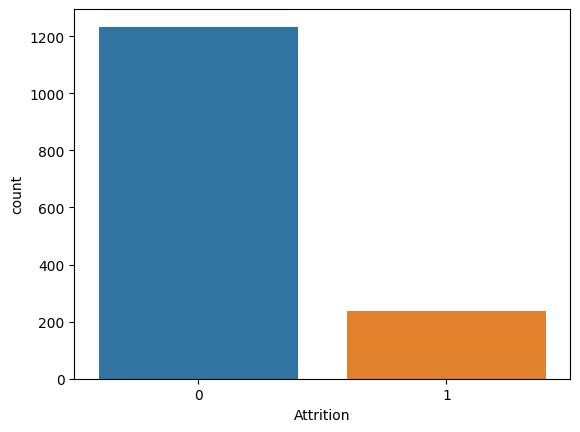

In [11]:
# Graficando la variable salida
sns.countplot(x="Attrition", data=fraude_df);

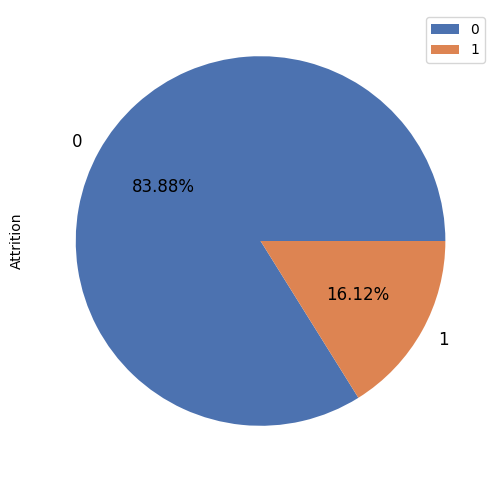

In [12]:
# Graficando la variable salida
values = fraude_df['Attrition'].value_counts()
colors = sns.color_palette('deep')
plt.figure(figsize=(6,6))
values.plot(kind='pie', colors = colors,fontsize=12, autopct='%1.2f%%')
plt.legend(labels=values.index)
plt.show()

In [13]:
# Eliminar las variable que no aportan(unaria) 
fraude_df=fraude_df.drop(['EmployeeCount'], axis=1)
fraude_df=fraude_df.drop(['Over18'], axis=1)
fraude_df=fraude_df.drop(['StandardHours'], axis=1)

In [14]:
# Verificar las columnas categóticas
for categoricas in ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'] :
    print(fraude_df[categoricas].value_counts())
    print()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Male      882
Female    588
Name: Gender, dtype: int64

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

No     1054
Yes     416
Name: OverTime, dtype: int64



In [15]:
cambio_gender = {"Gender": {"Male": 0, "Female": 1}}
cambio_overTime = {"OverTime": {"No": 0, "Yes": 1}}

In [16]:
fraude_df = fraude_df.replace(cambio_gender)
fraude_df = fraude_df.replace(cambio_overTime)
fraude_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [17]:
# Aplicación de varibles ficticias para las variables no numéricas con más de 2 categorias
columnas_dummies=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
fraude_df=pd.get_dummies(fraude_df, columns=columnas_dummies)
fraude_df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,2,1,94,3,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,2,3,0,61,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,4,4,0,92,2,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,5,4,1,56,3,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,7,1,0,40,3,...,1,0,0,0,0,0,0,0,1,0


In [18]:
# Mostrar la dimension del dataset
fraude_df.shape

(1470, 51)

In [19]:
import seaborn as sns    #Graficar y ver los valores missing
import missingno as msno

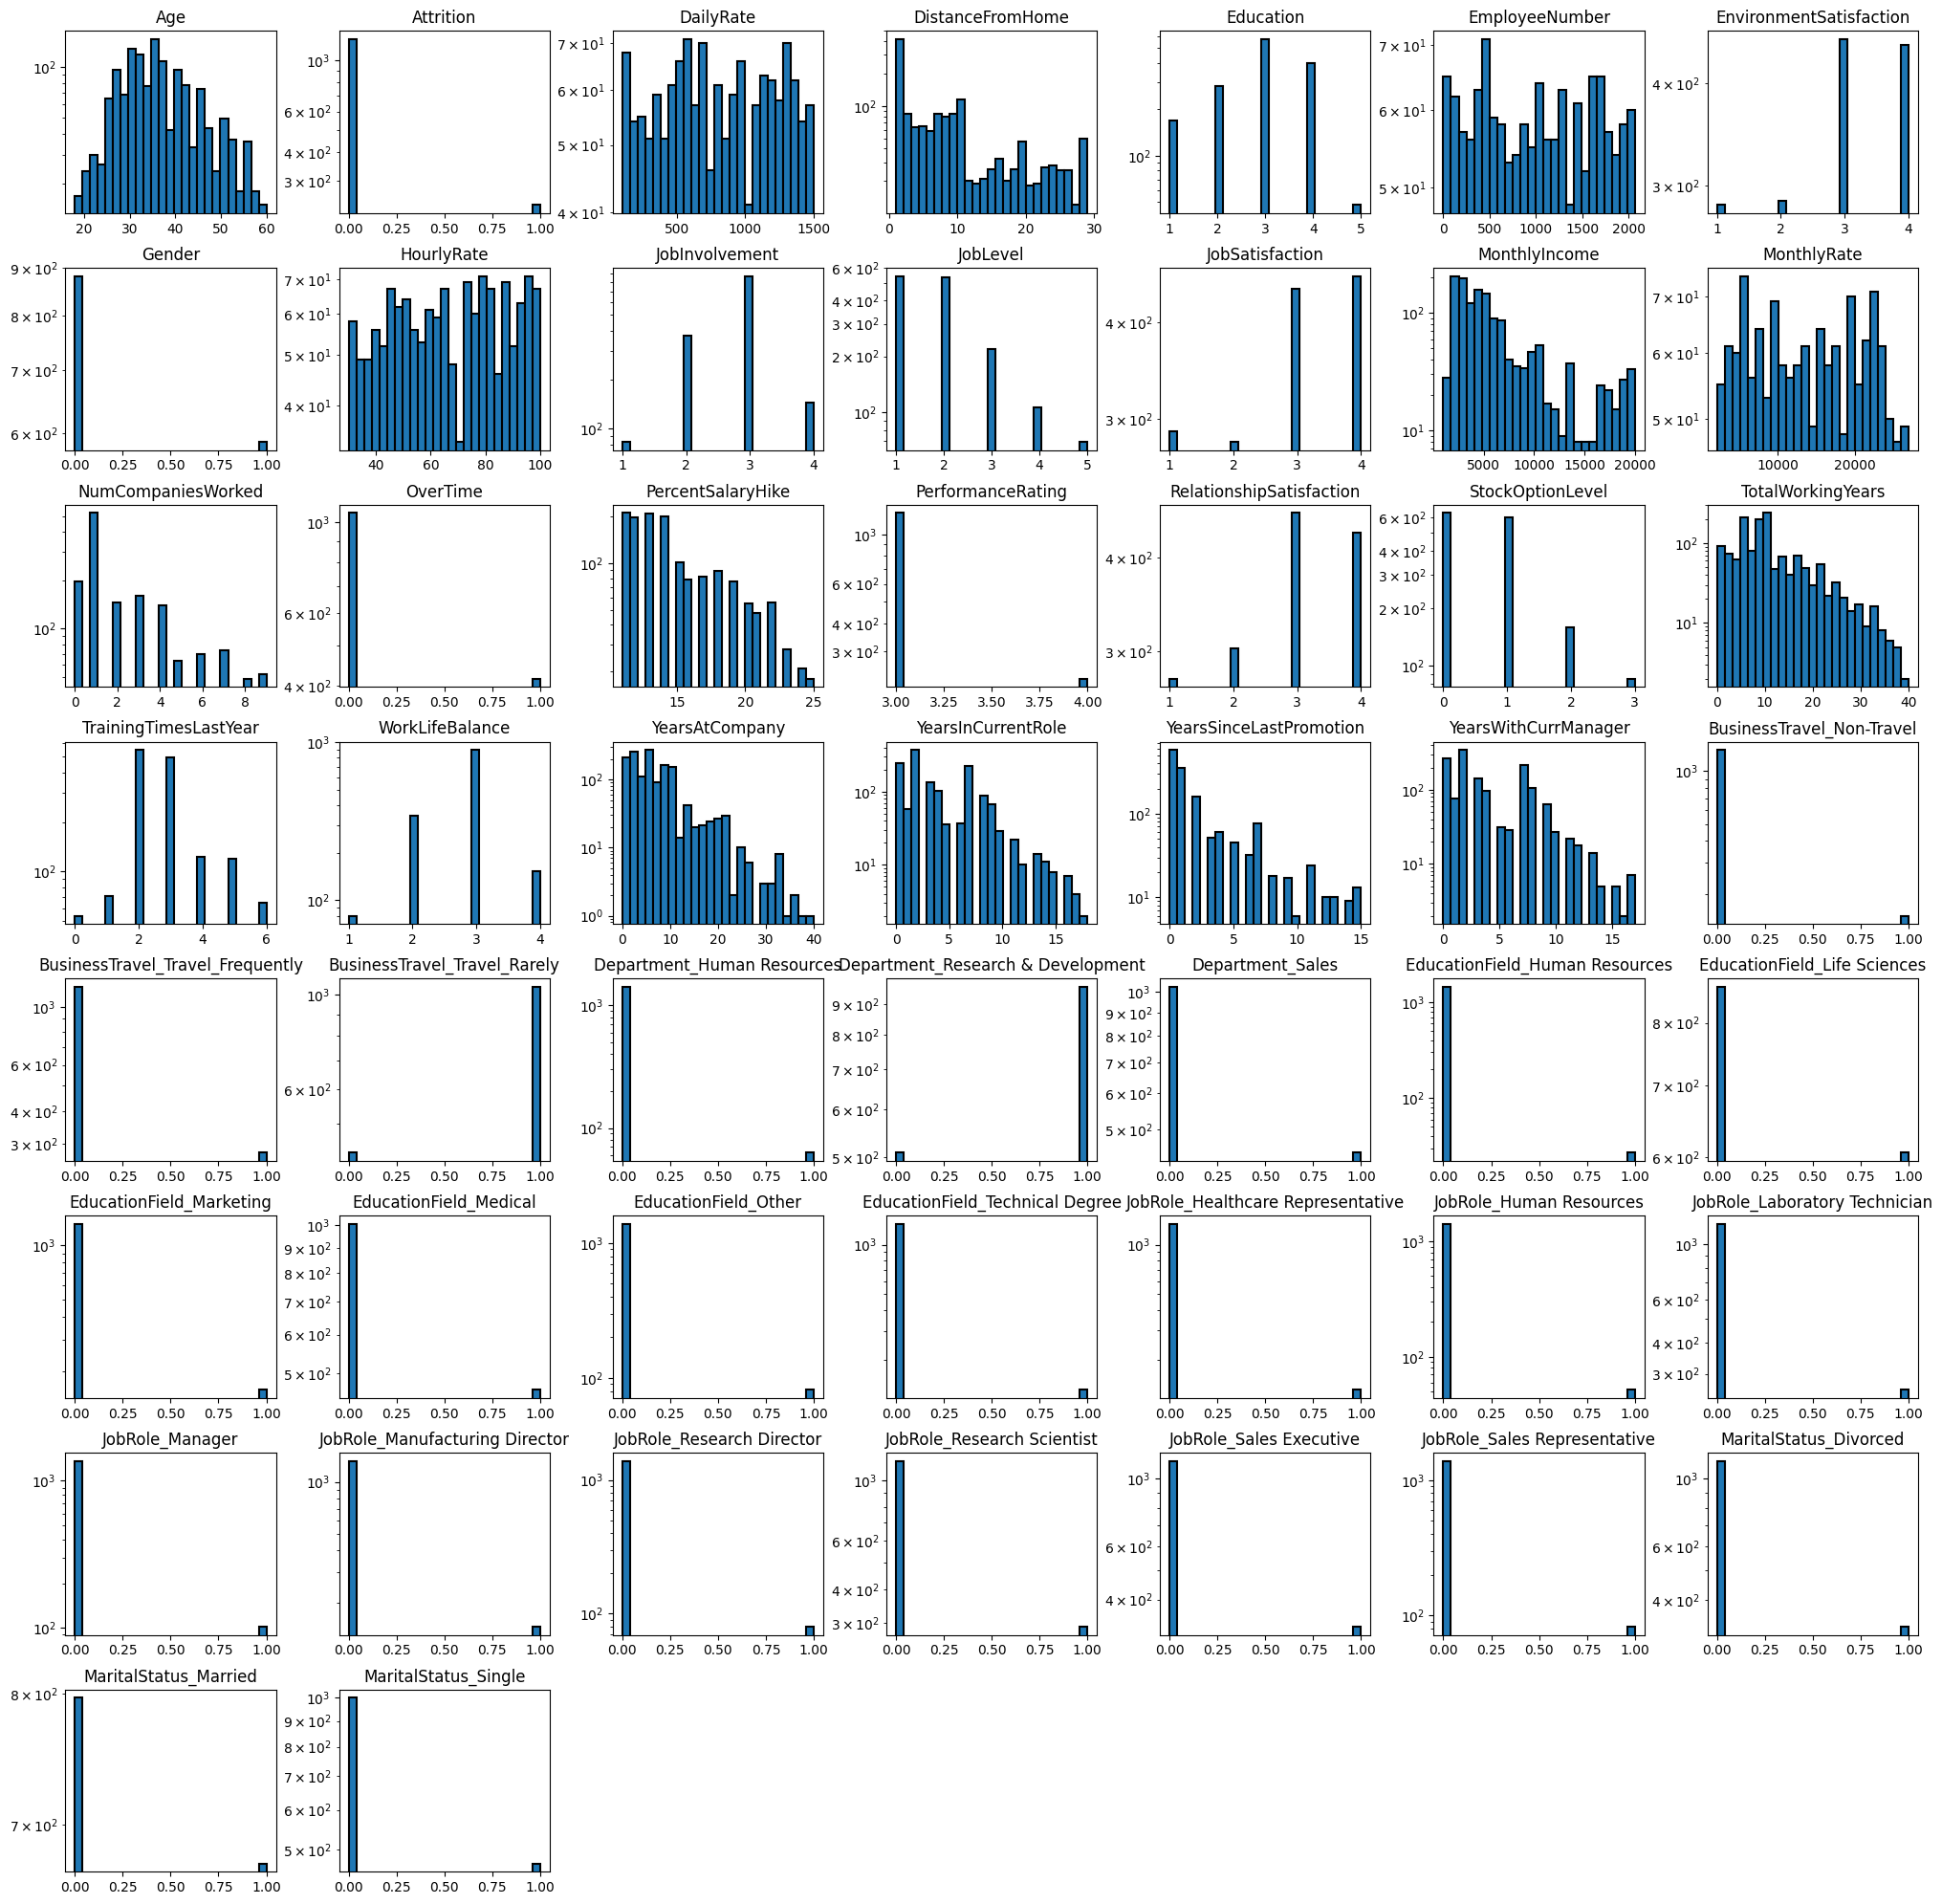

In [ ]:
# Histogramas de las variables 
fraude_df.hist(edgecolor='black' , log=True, linewidth=1.5, bins=25, grid=False, figsize=(25, 25))
plt.show()

In [ ]:
fraude_df.corr().style.background_gradient()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.036311,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.011215,-0.024743,0.028791,0.020523,0.017883,-0.027549,0.001696,0.016824,0.038162,-0.006354,-0.041466,-0.027604,0.098825,-0.029856,-0.143176,0.294248,0.049726,0.185891,-0.146518,-0.002001,-0.175785,0.033120,0.083919,-0.119185
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.010577,-0.103369,-0.029453,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.015170,0.043494,0.246118,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199,-0.074457,0.115143,-0.049538,0.016832,-0.085293,0.080855,0.036466,-0.032703,0.055781,-0.046999,-0.017898,0.069355,-0.078696,0.036215,0.098290,-0.083316,-0.082994,-0.088870,-0.000360,0.019774,0.157234,-0.087716,-0.090984,0.175419
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.011716,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,0.012096,-0.011776,0.002078,-0.026726,0.014871,-0.003616,-0.043144,0.004028,-0.064449,0.034202,-0.003893,0.030869,0.040141,-0.021156,-0.006728,-0.013224,-0.005302,-0.000021,-0.002624,-0.000513,0.005375,0.037080,0.040035,-0.075835
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.001851,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.023605,0.005081,-0.020116,-0.012901,-0.008117,0.014085,-0.002624,-0.024499,0.039294,0.013486,-0.007969,-0.014802,0.022916,-0.024089,0.012369,-0.039190,0.011848,-0.022351,-0.010986,0.030761,-0.015994,-0.005440,0.030232,-0.027445
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016547,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,0.004524,-0.008292,0.004126,0.011435,-0.018604,0.014215,0.026479,0.013184,0.072405,-0.072335,0.038043,-0.026742,0.024270,-0.005295,-0.063566,0.028453,-0.005290,0.049694,0.000709,0.053398,-0.091465,-0.002439,-0.001865,0.004168
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,1.000000,0.017621,-0.022556,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.024037,-0.012944,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197,0.022272,-0.007980,-0.007976,0.063431,-0.041923,0.015441,0.035345,-0.000609,-0.014487,-0.008689,0.010432,0.005938,0.025945,0.067287,-0.019722,-0.035058,-0.014350,-0.013983,-0.017686,0.023263,0.006255,-0.025149,0

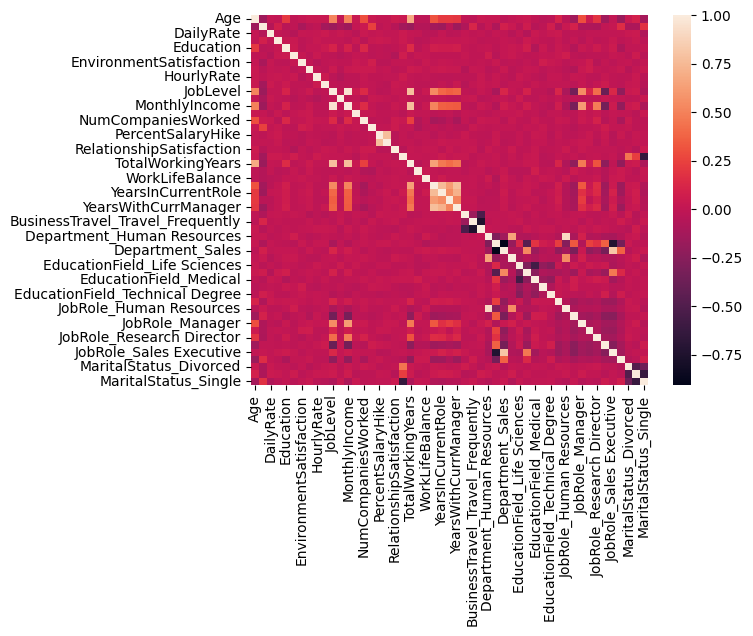

In [ ]:
# Verificar correlaciones entre las variables
sns.heatmap(fraude_df.corr());

In [20]:
# Correlaciones con la variable de salida(es importante la correlacion dela variable objetivo(SITUACION_DESERCION_URP)con las demas variables )
fraude_df.corr()["Attrition"]

Age                                 -0.159205
Attrition                            1.000000
DailyRate                           -0.056652
DistanceFromHome                     0.077924
Education                           -0.031373
EmployeeNumber                      -0.010577
EnvironmentSatisfaction             -0.103369
Gender                              -0.029453
HourlyRate                          -0.006846
JobInvolvement                      -0.130016
JobLevel                            -0.169105
JobSatisfaction                     -0.103481
MonthlyIncome                       -0.159840
MonthlyRate                          0.015170
NumCompaniesWorked                   0.043494
OverTime                             0.246118
PercentSalaryHike                   -0.013478
PerformanceRating                    0.002889
RelationshipSatisfaction            -0.045872
StockOptionLevel                    -0.137145
TotalWorkingYears                   -0.171063
TrainingTimesLastYear             

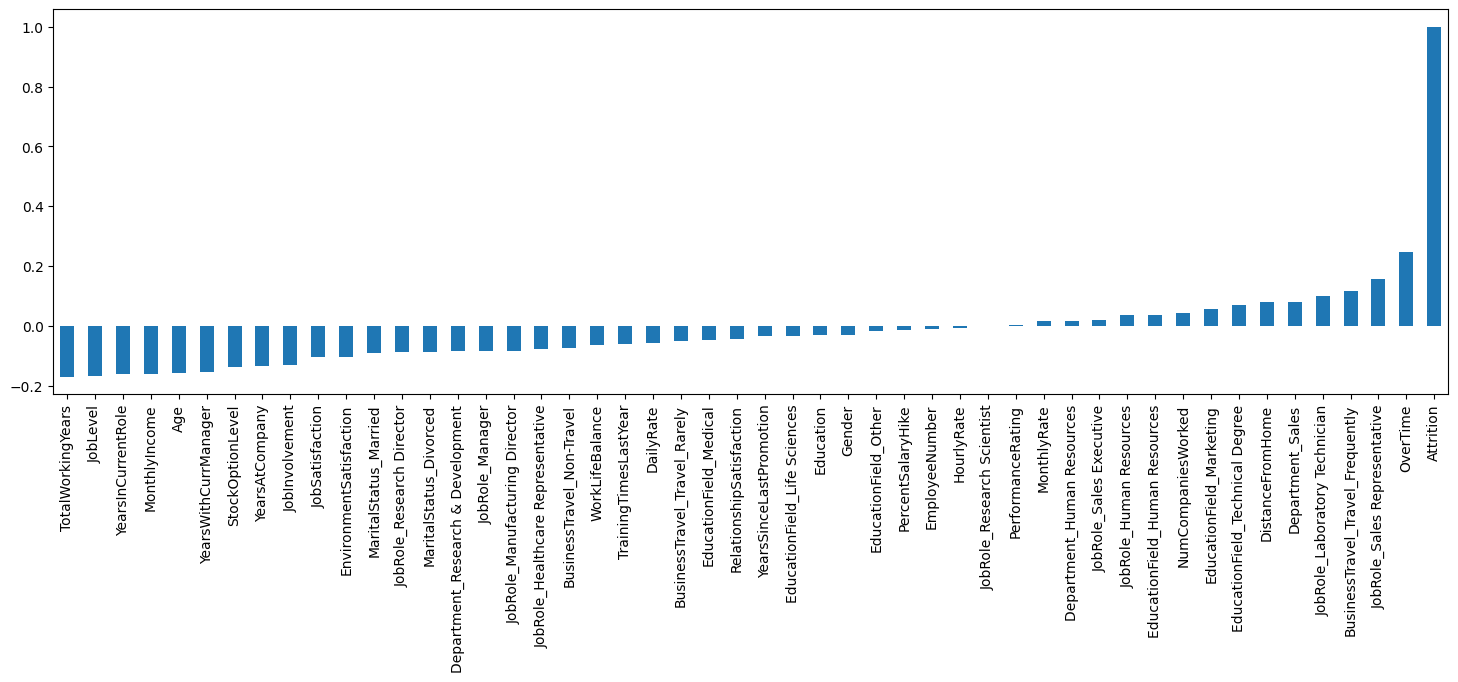

In [ ]:
fraude_df.corr()["Attrition"][:-1].sort_values().plot(kind="bar", figsize=(18,5));

In [21]:
fraude_df.drop('Attrition',axis=1)

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,1,2,1,94,3,2,...,0,0,0,0,0,1,0,0,0,1
1,49,279,8,1,2,3,0,61,2,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1373,2,2,4,4,0,92,2,1,...,1,0,0,0,0,0,0,0,0,1
3,33,1392,3,4,5,4,1,56,3,1,...,0,0,0,0,1,0,0,0,1,0
4,27,591,2,1,7,1,0,40,3,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,2061,3,0,41,4,2,...,1,0,0,0,0,0,0,0,1,0
1466,39,613,6,1,2062,4,0,42,2,3,...,0,0,0,0,0,0,0,0,1,0
1467,27,155,4,3,2064,2,0,87,4,2,...,0,0,1,0,0,0,0,0,1,0
1468,49,1023,2,3,2065,4,0,63,2,2,...,0,0,0,0,0,1,0,0,1,0


In [22]:
fraude_df.Attrition

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [23]:
fraude_df.Attrition.unique()

array([1, 0])

In [24]:
from imblearn.over_sampling import RandomOverSampler

In [25]:

ros = RandomOverSampler(random_state=42)
X_, y = ros.fit_resample(fraude_df.drop('Attrition',axis=1),fraude_df.Attrition)
X = pd.DataFrame(X_,columns=fraude_df.drop('Attrition',axis=1).columns)

In [26]:
# Creación de la data de train y la data de test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=123)

In [27]:
y_train.value_counts()

0    886
1    840
Name: Attrition, dtype: int64

In [28]:
y_test.value_counts()

1    393
0    347
Name: Attrition, dtype: int64

In [29]:
print("Data entrenamiento - entrada: \n", X_train.shape,
      "\n Data prueba entrada: \n", X_test.shape, 
      "\n Data entrenamiento - salida: \n", y_train.shape, 
      "\n Data prueba salida: \n", y_test.shape)

Data entrenamiento - entrada: 
 (1726, 50) 
 Data prueba entrada: 
 (740, 50) 
 Data entrenamiento - salida: 
 (1726,) 
 Data prueba salida: 
 (740,)


Estandarización

In [30]:
escalador = StandardScaler() 

In [31]:
X_train = escalador.fit_transform(X_train)          
X_test = escalador.transform(X_test)  

In [32]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score, recall_score, precision_score
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

**VALIDACIÓN CRUZADA**

SVC

In [ ]:
from sklearn.svm import SVC

svc_model = SVC()

parametros = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'tol': [1e-3, 1e-4, 1e-5],
    'max_iter': [1000, 2000],
    'random_state': [42]
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'precision_macro': make_scorer(precision_score, average='macro')
}

clf = GridSearchCV(svc_model, parametros, cv=5, scoring=scoring, refit=False)
clf.fit(X_train, y_train)

df_svc_model = pd.concat([
    pd.DataFrame(clf.cv_results_["params"]),
    pd.DataFrame(clf.cv_results_["mean_score_time"], columns=["Tiempo_segundos"]),
    pd.DataFrame(clf.cv_results_["mean_test_accuracy"], columns=["Accuracy"]),
    pd.DataFrame(clf.cv_results_["mean_test_f1_macro"], columns=["F1_macro"]),
    pd.DataFrame(clf.cv_results_["mean_test_recall_macro"], columns=["Recall_macro"]),
    pd.DataFrame(clf.cv_results_["mean_test_precision_macro"], columns=["Precision_macro"])
], axis=1)

display(df_svc_model)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

,C,gamma,kernel,max_iter,random_state,tol,Tiempo_segundos,Accuracy,F1_macro,Recall_macro,Precision_macro
0,1,scale,linear,1000,42,0.00100,0.022671,0.599135,0.577249,0.593719,0.608733
1,1,scale,linear,1000,42,0.00010,0.021868,0.599135,0.577249,0.593719,0.608733
2,1,scale,linear,1000,42,0.00001,0.022824,0.599135,0.577249,0.593719,0.608733
3,1,scale,linear,2000,42,0.00100,0.017802,0.562557,0.527148,0.555761,0.573819
4,1,scale,linear,2000,42,0.00010,0.014048,0.562557,0.527148,0.555761,0.573819
...,...,...,...,...,...,...,...,...,...,...,...
175,100,10,rbf,1000,42,0.00010,0.039267,0.975106,0.974991,0.974405,0.977374
176,100,10,rbf,1000,42,0.00001,0.039919,0.975106,0.974991,0.974405,0.977374
177,100,10,rbf,2000,42,0.00100,0.042346,0.975106,0.974991,0.974405,0.977374
178,100,10,rbf,2000,42,0.00010,0.040310,0.975106,0.974991,0.974405,0.977374


In [ ]:
display("Mejor puntaje de accuracy:", df_svc_model['Accuracy'].max())
display("Mejor configuracion de parámetros:",  df_svc_model.loc[df_svc_model['Accuracy'].idxmax()])

display("Mejor puntaje de F1_macro:", df_svc_model['F1_macro'].max())
display("Mejor configuracion de parámetros:",  df_svc_model.loc[df_svc_model['F1_macro'].idxmax()])

display("Mejor puntaje de recall_macro:", df_svc_model['Recall_macro'].max())
display("Mejor configuracion de parámetros:",  df_svc_model.loc[df_svc_model['Recall_macro'].idxmax()])

display("Mejor puntaje de precision_macro:", df_svc_model['Precision_macro'].max())
display("Mejor configuracion de parámetros:",  df_svc_model.loc[df_svc_model['Precision_macro'].idxmax()])

'Mejor puntaje de accuracy:'

0.9751059730250482

'Mejor configuracion de parámetros:'

C                         1
gamma                     1
kernel                  rbf
max_iter               1000
random_state             42
tol                   0.001
Tiempo_segundos    0.036072
Accuracy           0.975106
F1_macro           0.974991
Recall_macro       0.974405
Precision_macro    0.977374
Name: 42, dtype: object

'Mejor puntaje de F1_macro:'

0.974998839000244

'Mejor configuracion de parámetros:'

C                         1
gamma                   0.1
kernel                  rbf
max_iter               1000
random_state             42
tol                   0.001
Tiempo_segundos    0.057363
Accuracy           0.975104
F1_macro           0.974999
Recall_macro       0.974435
Precision_macro    0.977186
Name: 30, dtype: object

'Mejor puntaje de recall_macro:'

0.9744350282485875

'Mejor configuracion de parámetros:'

C                         1
gamma                   0.1
kernel                  rbf
max_iter               1000
random_state             42
tol                   0.001
Tiempo_segundos    0.057363
Accuracy           0.975104
F1_macro           0.974999
Recall_macro       0.974435
Precision_macro    0.977186
Name: 30, dtype: object

'Mejor puntaje de precision_macro:'

0.9773743107882342

'Mejor configuracion de parámetros:'

C                         1
gamma                     1
kernel                  rbf
max_iter               1000
random_state             42
tol                   0.001
Tiempo_segundos    0.036072
Accuracy           0.975106
F1_macro           0.974991
Recall_macro       0.974405
Precision_macro    0.977374
Name: 42, dtype: object

NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score, recall_score, precision_score
import pandas as pd

# Definir los parámetros a considerar
param_grid = {
    'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001),
    'fit_prior': [True, False]
}

# Definir las métricas de evaluación
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'precision_macro': make_scorer(precision_score, average='macro')
}

# Crear el objeto GridSearchCV con el clasificador BernoulliNB
clf = GridSearchCV(estimator=BernoulliNB(), param_grid=param_grid, cv=5, scoring=scoring, refit=False)

# Ajustar el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)

# Crear un DataFrame con los resultados obtenidos
df_NB = pd.concat([
    pd.DataFrame(clf.cv_results_["params"]),
    pd.DataFrame(clf.cv_results_["mean_score_time"], columns=["Tiempo_segundos"]),
    pd.DataFrame(clf.cv_results_["mean_test_accuracy"], columns=["Accuracy"]),
    pd.DataFrame(clf.cv_results_["mean_test_f1_macro"], columns=["F1_macro"]),
    pd.DataFrame(clf.cv_results_["mean_test_recall_macro"], columns=["Recall_macro"]),
    pd.DataFrame(clf.cv_results_["mean_test_precision_macro"], columns=["Precision_macro"])
], axis=1)

# Mostrar el DataFrame con los resultados
display(df_NB)

,alpha,fit_prior,Tiempo_segundos,Accuracy,F1_macro,Recall_macro,Precision_macro
0,1.00000,True,0.006015,0.719600,0.719400,0.719968,0.720433
1,1.00000,False,0.005594,0.720759,0.720603,0.721279,0.721777
2,0.10000,True,0.005949,0.719020,0.718818,0.719403,0.719889
3,0.10000,False,0.006975,0.719600,0.719452,0.720089,0.720521
4,0.01000,True,0.005679,0.719020,0.718818,0.719403,0.719889
5,0.01000,False,0.005767,0.719600,0.719452,0.720089,0.720521
6,0.00100,True,0.005839,0.719020,0.718818,0.719403,0.719889
7,0.00100,False,0.005967,0.719600,0.719452,0.720089,0.720521
8,0.00010,True,0.006078,0.719020,0.718818,0.719403,0.719889
9,0.00010,False,0.005722,0.719600,0.719452,0.720089,0.720521


In [ ]:
display("Mejor puntaje de accuracy:", df_NB['Accuracy'].max())
display("Mejor configuracion de parámetros:",  df_NB.loc[df_NB['Accuracy'].idxmax()])

display("Mejor puntaje de F1_macro:", df_NB['F1_macro'].max())
display("Mejor configuracion de parámetros:",  df_NB.loc[df_NB['F1_macro'].idxmax()])

display("Mejor puntaje de recall_macro:", df_NB['Recall_macro'].max())
display("Mejor configuracion de parámetros:",  df_NB.loc[df_NB['Recall_macro'].idxmax()])

display("Mejor puntaje de precision_macro:", df_NB['Precision_macro'].max())
display("Mejor configuracion de parámetros:",  df_NB.loc[df_NB['Precision_macro'].idxmax()])

'Mejor puntaje de accuracy:'

0.720758984669515

'Mejor configuracion de parámetros:'

alpha                   1.0
fit_prior             False
Tiempo_segundos    0.005594
Accuracy           0.720759
F1_macro           0.720603
Recall_macro       0.721279
Precision_macro    0.721777
Name: 1, dtype: object

'Mejor puntaje de F1_macro:'

0.72060316309927

'Mejor configuracion de parámetros:'

alpha                   1.0
fit_prior             False
Tiempo_segundos    0.005594
Accuracy           0.720759
F1_macro           0.720603
Recall_macro       0.721279
Precision_macro    0.721777
Name: 1, dtype: object

'Mejor puntaje de recall_macro:'

0.7212791667800238

'Mejor configuracion de parámetros:'

alpha                   1.0
fit_prior             False
Tiempo_segundos    0.005594
Accuracy           0.720759
F1_macro           0.720603
Recall_macro       0.721279
Precision_macro    0.721777
Name: 1, dtype: object

'Mejor puntaje de precision_macro:'

0.721777226069914

'Mejor configuracion de parámetros:'

alpha                   1.0
fit_prior             False
Tiempo_segundos    0.005594
Accuracy           0.720759
F1_macro           0.720603
Recall_macro       0.721279
Precision_macro    0.721777
Name: 1, dtype: object

RAMDOM FOREST

In [33]:
param_grid = {
    'n_estimators': [200,500],
    'bootstrap': [False, True],
     'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'max_features': ['sqrt', 'log2', None]

}

scoring = {'accuracy': make_scorer(accuracy_score)}

clf = GridSearchCV(estimator= RandomForestClassifier(), param_grid =param_grid, cv=5, scoring=scoring, refit=False)
clf.fit(X_train, y_train)
df = pd.concat([
                pd.DataFrame(clf.cv_results_["params"]),
                 pd.DataFrame(clf.cv_results_["mean_score_time"],
                                       columns=["Tiempo_segundos"]),
                pd.DataFrame(clf.cv_results_["mean_test_accuracy"],
                             columns=["Accuracy"])],
                axis=1)
df

,bootstrap,criterion,max_depth,max_features,n_estimators,Tiempo_segundos,Accuracy
0,False,gini,10.0,sqrt,200,0.032297,0.962942
1,False,gini,10.0,sqrt,500,0.095031,0.960625
2,False,gini,10.0,log2,200,0.032825,0.958887
3,False,gini,10.0,log2,500,0.085423,0.964103
4,False,gini,10.0,None,200,0.032111,0.887025
...,...,...,...,...,...,...,...
391,True,log_loss,NaN,sqrt,500,0.085943,0.958311
392,True,log_loss,NaN,log2,200,0.032662,0.960045
393,True,log_loss,NaN,log2,500,0.087873,0.959466
394,True,log_loss,NaN,None,200,0.033200,0.943818


In [34]:
display("Mejor puntaje de accuracy:", df['Accuracy'].max())
display("Mejor configuracion de parámetros:",  df.loc[df['Accuracy'].idxmax()])

'Mejor puntaje de accuracy:'

0.9733668425902655

'Mejor configuracion de parámetros:'

bootstrap             False
criterion              gini
max_depth              20.0
max_features           log2
n_estimators            500
Tiempo_segundos    0.082217
Accuracy           0.973367
Name: 9, dtype: object

REGRESIÓN LOGÍSTICA

In [ ]:
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'precision_macro': make_scorer(precision_score, average='macro')
}

clf = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, scoring=scoring, refit=False)
clf.fit(X_train, y_train)

df_LR = pd.concat([
    pd.DataFrame(clf.cv_results_["params"]),
    pd.DataFrame(clf.cv_results_["mean_score_time"], columns=["Tiempo_segundos"]),
    pd.DataFrame(clf.cv_results_["mean_test_accuracy"], columns=["Accuracy"]),
    pd.DataFrame(clf.cv_results_["mean_test_f1_macro"], columns=["F1_macro"]),
    pd.DataFrame(clf.cv_results_["mean_test_recall_macro"], columns=["Recall_macro"]),
    pd.DataFrame(clf.cv_results_["mean_test_precision_macro"], columns=["Precision_macro"])
], axis=1)

display(df_LR)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

,C,penalty,solver,Tiempo_segundos,Accuracy,F1_macro,Recall_macro,Precision_macro
0,0.001,l2,newton-cg,0.026025,0.767692,0.767379,0.767404,0.768083
1,0.001,l2,lbfgs,0.014514,0.767692,0.767379,0.767404,0.768083
2,0.001,l2,liblinear,0.021884,0.755528,0.755332,0.755867,0.756432
3,0.001,l2,sag,0.016124,0.767692,0.767379,0.767404,0.768083
4,0.010,l2,newton-cg,0.017931,0.779269,0.778895,0.778996,0.780020
5,0.010,l2,lbfgs,0.018045,0.779269,0.778895,0.778996,0.780020
6,0.010,l2,liblinear,0.018578,0.781588,0.781326,0.781528,0.782148
7,0.010,l2,sag,0.021836,0.779269,0.778895,0.778996,0.780020
8,0.100,l2,newton-cg,0.007992,0.776374,0.776072,0.776286,0.776953
9,0.100,l2,lbfgs,0.008262,0.776374,0.776072,0.776286,0.776953


In [ ]:
display("Mejor puntaje de accuracy:", df_LR['Accuracy'].max())
display("Mejor configuracion de parámetros:", df_LR.loc[df_LR['Accuracy'].idxmax()])

display("Mejor puntaje de F1_macro:", df_LR['F1_macro'].max())
display("Mejor configuracion de parámetros:",  df_LR.loc[df_LR['F1_macro'].idxmax()])

display("Mejor puntaje de recall_macro:", df_LR['Recall_macro'].max())
display("Mejor configuracion de parámetros:",  df_LR.loc[df_LR['Recall_macro'].idxmax()])

display("Mejor puntaje de precision_macro:", df_LR['Precision_macro'].max())
display("Mejor configuracion de parámetros:",  df_LR.loc[df_LR['Precision_macro'].idxmax()])

'Mejor puntaje de accuracy:'

0.7815883387785876

'Mejor configuracion de parámetros:'

C                       0.01
penalty                   l2
solver             liblinear
Tiempo_segundos     0.018578
Accuracy            0.781588
F1_macro            0.781326
Recall_macro        0.781528
Precision_macro     0.782148
Name: 6, dtype: object

'Mejor puntaje de F1_macro:'

0.7813258799309102

'Mejor configuracion de parámetros:'

C                       0.01
penalty                   l2
solver             liblinear
Tiempo_segundos     0.018578
Accuracy            0.781588
F1_macro            0.781326
Recall_macro        0.781528
Precision_macro     0.782148
Name: 6, dtype: object

'Mejor puntaje de recall_macro:'

0.7815284616989053

'Mejor configuracion de parámetros:'

C                       0.01
penalty                   l2
solver             liblinear
Tiempo_segundos     0.018578
Accuracy            0.781588
F1_macro            0.781326
Recall_macro        0.781528
Precision_macro     0.782148
Name: 6, dtype: object

'Mejor puntaje de precision_macro:'

0.7821482477147004

'Mejor configuracion de parámetros:'

C                       0.01
penalty                   l2
solver             liblinear
Tiempo_segundos     0.018578
Accuracy            0.781588
F1_macro            0.781326
Recall_macro        0.781528
Precision_macro     0.782148
Name: 6, dtype: object

ÁRBOL DE DECISIÓN

In [ ]:
param_grid = {
  'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}


scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'precision_macro': make_scorer(precision_score, average='macro')
}

# Crear el modelo de árbol de decisión
tree = DecisionTreeClassifier()

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5,  scoring=scoring, refit=False)
grid_search.fit(X_train, y_train)

df_DT = pd.concat([
    pd.DataFrame(grid_search.cv_results_["params"]),
    pd.DataFrame(grid_search.cv_results_["mean_score_time"], columns=["Tiempo_segundos"]),
    pd.DataFrame(grid_search.cv_results_["mean_test_accuracy"], columns=["Accuracy"]),
    pd.DataFrame(grid_search.cv_results_["mean_test_f1_macro"], columns=["F1_macro"]),
    pd.DataFrame(grid_search.cv_results_["mean_test_recall_macro"], columns=["Recall_macro"]),
    pd.DataFrame(grid_search.cv_results_["mean_test_precision_macro"], columns=["Precision_macro"])
], axis=1)

display(df_DT)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

,criterion,max_depth,max_features,min_samples_leaf,min_samples_split,splitter,Tiempo_segundos,Accuracy,F1_macro,Recall_macro,Precision_macro
0,gini,NaN,auto,1,2,best,0.005755,0.889366,0.889011,0.891470,0.898673
1,gini,NaN,auto,1,2,random,0.005388,0.881831,0.881367,0.884095,0.892759
2,gini,NaN,auto,1,5,best,0.005764,0.866176,0.865989,0.867669,0.870939
3,gini,NaN,auto,1,5,random,0.006294,0.860390,0.860259,0.861377,0.863371
4,gini,NaN,auto,1,10,best,0.005381,0.825050,0.824856,0.826073,0.828133
...,...,...,...,...,...,...,...,...,...,...,...
211,entropy,10.0,sqrt,4,2,random,0.005389,0.750872,0.750734,0.751453,0.752156
212,entropy,10.0,sqrt,4,5,best,0.008162,0.805331,0.805112,0.805424,0.806245
213,entropy,10.0,sqrt,4,5,random,0.024513,0.757832,0.757070,0.757328,0.759296
214,entropy,10.0,sqrt,4,10,best,0.012266,0.817519,0.817312,0.817632,0.818306


In [ ]:
display("Mejor puntaje de accuracy:", df_DT['Accuracy'].max())
display("Mejor configuracion de parámetros:", df_DT.loc[df_DT['Accuracy'].idxmax()])

display("Mejor puntaje de F1_macro:", df_DT['F1_macro'].max())
display("Mejor configuracion de parámetros:",  df_DT.loc[df_DT['F1_macro'].idxmax()])

display("Mejor puntaje de recall_macro:", df_DT['Recall_macro'].max())
display("Mejor configuracion de parámetros:",  df_DT.loc[df_DT['Recall_macro'].idxmax()])

display("Mejor puntaje de precision_macro:", df_DT['Precision_macro'].max())
display("Mejor configuracion de parámetros:",  df_DT.loc[df_DT['Precision_macro'].idxmax()])

'Mejor puntaje de accuracy:'

0.8992091815363994

'Mejor configuracion de parámetros:'

criterion             entropy
max_depth                 NaN
max_features             sqrt
min_samples_leaf            1
min_samples_split           2
splitter               random
Tiempo_segundos        0.0057
Accuracy             0.899209
F1_macro             0.898986
Recall_macro         0.901043
Precision_macro      0.906816
Name: 127, dtype: object

'Mejor puntaje de F1_macro:'

0.8989862803221722

'Mejor configuracion de parámetros:'

criterion             entropy
max_depth                 NaN
max_features             sqrt
min_samples_leaf            1
min_samples_split           2
splitter               random
Tiempo_segundos        0.0057
Accuracy             0.899209
F1_macro             0.898986
Recall_macro         0.901043
Precision_macro      0.906816
Name: 127, dtype: object

'Mejor puntaje de recall_macro:'

0.9010429986125091

'Mejor configuracion de parámetros:'

criterion             entropy
max_depth                 NaN
max_features             sqrt
min_samples_leaf            1
min_samples_split           2
splitter               random
Tiempo_segundos        0.0057
Accuracy             0.899209
F1_macro             0.898986
Recall_macro         0.901043
Precision_macro      0.906816
Name: 127, dtype: object

'Mejor puntaje de precision_macro:'

0.9068158281428899

'Mejor configuracion de parámetros:'

criterion             entropy
max_depth                 NaN
max_features             sqrt
min_samples_leaf            1
min_samples_split           2
splitter               random
Tiempo_segundos        0.0057
Accuracy             0.899209
F1_macro             0.898986
Recall_macro         0.901043
Precision_macro      0.906816
Name: 127, dtype: object

**MODELO CON LOS MEJORES HIPERPARÁMETROS**

In [35]:


mnb = BernoulliNB(alpha = 0.1, fit_prior = False)
lr = LogisticRegression(C=0.01,  penalty='l2', solver='liblinear')
svm_rbf = SVC(kernel='rbf', C=1, gamma=1, max_iter=1000, random_state = 42, tol = 0.001)
rf = RandomForestClassifier(n_estimators=500, bootstrap=False, criterion='gini', max_depth=20, max_features='log2')
dt = DecisionTreeClassifier( max_features= 'sqrt', min_samples_leaf = 1, min_samples_split = 2, splitter ='random', criterion = 'entropy' )


clasificadores = {'BernoulliNB Naive Bayes': mnb,
                  'Regresion Logistica': lr,
                  'SVM rbf': svm_rbf,
                  'Random Forest': rf,
                  'Decision Tree':dt
                  }

# Ajustamos los modelos y calculamos el accuracy para los datos de entrenamiento
for k, v in clasificadores.items():
    print(k,'oo',v)
    print ('CREANDO MODELO: {clas}'.format(clas=k))
    v.fit(X_train, y_train)
    accuracy_train = v.score(X_train, y_train)
    print ('\tAccuracy Train: {acc_train}'.format(acc_train=accuracy_train)) 

BernoulliNB Naive Bayes oo BernoulliNB(alpha=0.1, fit_prior=False)
CREANDO MODELO: BernoulliNB Naive Bayes
	Accuracy Train: 0.7259559675550405
Regresion Logistica oo LogisticRegression(C=0.01, solver='liblinear')
CREANDO MODELO: Regresion Logistica
	Accuracy Train: 0.7937427578215527
SVM rbf oo SVC(C=1, gamma=1, max_iter=1000, random_state=42)
CREANDO MODELO: SVM rbf


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


	Accuracy Train: 1.0
Random Forest oo RandomForestClassifier(bootstrap=False, max_depth=20, max_features='log2',
                       n_estimators=500)
CREANDO MODELO: Random Forest
	Accuracy Train: 1.0
Decision Tree oo DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       splitter='random')
CREANDO MODELO: Decision Tree
	Accuracy Train: 1.0


In [36]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,zero_one_loss

def evaluation(model, name, X_train, y_train, X_test, y_test):
    """
    Función de devuelve en un diccionario las métricas de evaluación de 
    Accuracy, Precision, Recall y F1 para los conjuntos de datos de entrenamiento y test
        model: modelo a evaluar
        name: nombre del modelo
        X_train: Variables de entrada del conjunto de datos de entrenamiento
        y_train: Variable de salida del conjunto de datos de entrenamiento
        X_test: Variables de entrada del conjunto de datos de test
        y_test: Variable de salida del conjunto de datos de test
        return: diccionario con el nombre del modelo y el valor de las métricas
    """
    model_dict = {}
    model_dict['name'] = name
    y_pred_train = model.predict(X_train)
    # print(X_train, "X_train")
    print(y_pred_train, "y_pred_train")
    X_test.shape[0]
    y_pred_test = model.predict(X_test)
    # print(y_pred_test, "y_pred_test")
    model_dict['accuracy_train'] = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    model_dict['accuracy_tests'] = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    model_dict['precision_train'] = precision_score(y_true=y_train, y_pred=y_pred_train)
    model_dict['precision_tests'] = precision_score(y_true=y_test, y_pred=y_pred_test)
    model_dict['recall_train'] = recall_score(y_true=y_train, y_pred=y_pred_train)
    model_dict['recall_tests'] = recall_score(y_true=y_test, y_pred=y_pred_test)
    model_dict['f1_train'] = f1_score(y_true=y_train, y_pred=y_pred_train)
    model_dict['f1_tests'] = f1_score(y_true=y_test, y_pred=y_pred_test)
    model_dict['error_train'] = zero_one_loss(y_true=y_train, y_pred=y_pred_train)
    model_dict['error_tests'] = zero_one_loss(y_true=y_test, y_pred=y_pred_test)
    
    return model_dict


# Calculamos las métricas de los modelos por separado
evaluacion = list()
for key, model in clasificadores.items():
    evaluacion.append(evaluation(model=model, name=key, 
                                 X_train=X_train, y_train=y_train,
                                 X_test=X_test, y_test=y_test))

# Pasamos los resultados a un DataFrame para visualizarlos mejor
results = pd.DataFrame.from_dict(evaluacion)
results.set_index("name", inplace=True)
results

[1 0 1 ... 1 1 0] y_pred_train
[1 1 1 ... 1 1 0] y_pred_train
[0 1 1 ... 1 0 0] y_pred_train
[0 1 1 ... 1 0 0] y_pred_train
[0 1 1 ... 1 0 0] y_pred_train


,accuracy_train,accuracy_tests,precision_train,precision_tests,recall_train,recall_tests,f1_train,f1_tests,error_train,error_tests
name,,,,,,,,,,
BernoulliNB Naive Bayes,0.725956,0.706757,0.705028,0.715686,0.751190,0.743003,0.727378,0.729089,0.274044,0.293243
Regresion Logistica,0.793743,0.777027,0.784706,0.796875,0.794048,0.778626,0.789349,0.787645,0.206257,0.222973
SVM rbf,1.000000,0.990541,1.000000,1.000000,1.000000,0.982188,1.000000,0.991014,0.000000,0.009459
Random Forest,1.000000,0.982432,1.000000,0.975000,1.000000,0.992366,1.000000,0.983607,0.000000,0.017568
Decision Tree,1.000000,0.917568,1.000000,0.873874,1.000000,0.987277,1.000000,0.927121,0.000000,0.082432
